In [10]:
import pandas as pd
import geojson as gj
import csv


dir=("/Users/simonrabenmeister/Desktop/Genes_from_Space/bon-in-a-box-pipelines/output/GFS_IndicatorsTool/pop_area_by_habitat/9279d02e04f0d0adf29aa3cff92d775f/pop_habitat_area.tsv")
df = pd.read_csv(dir, sep="\t")


        
y2000=df[df.columns[1]]
ne_nc=[0.1, 0.5, 0.9]
density=[50,100]
result = [f * d for d in density for f in ne_nc]


pop_size_table= pd.DataFrame([y2000*d for d in result])
# Create new column names based on density and ne_nc values
new_columns = [f'density:{d}, Ne:Nc:{f}' for d in density for f in ne_nc]
pop_size_table.index = new_columns

file="/Users/simonrabenmeister/Desktop/Genes_from_Space/Genes_from_Space_interface/Test files/population_polygons_switzerland.geojson"
poly_file = gj.load(open(file))


# Remove all feature elements that have properties['pop'] not equal to 'pop_1', 'pop_2', 'pop_3'
poly_file['features'] = [feature for feature in poly_file['features'] if feature['properties'].get('pop') in ['pop_1', 'pop_2', 'pop_3']]

with open("/Users/simonrabenmeister/Desktop/Genes_from_Space/Genes_from_Space_interface/Test files/population_polygons_switzerland.geojson", "w") as f:
    gj.dump(poly_file, f)






In [ ]:
import geojson as gj
import json
with open("/Users/simonrabenmeister/Downloads/population_polygons (8).geojson") as file:
    poly_file = gj.load(file)
    
numbers = [5.10, 12.90, 0.00, 20.70, 0.00, 0.00, 0.00, 57.90, 0.00, 5.10, 15.60, 29.10, 341.40, 0.00, 13.20, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 5.10, 63.00, 0.00, 0.00, 175.20, 184.80, 63.00, 3720.30, 151.20, 5.40, 0.00]
numbers2= [12.92, 32.68, 0.00, 52.44, 0.00, 0.00, 0.00, 146.68, 0.00, 12.92, 39.52, 73.92, 864.88, 0.00, 33.44, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 12.92, 159.60, 0.00, 0.00, 444.64, 468.16, 159.60, 9405.76, 382.88, 13.04, 0.00]
print(len(numbers))


for i in range(32):
    poly_file["features"][i]["properties"]["size"]=[numbers[i], numbers2[i]]
    
print(poly_file["features"][2]["properties"])

with open("/Users/simonrabenmeister/Downloads/population_polygons_sizeincluded.geojson", "w") as f:
    json.dump(poly_file, f, )



32
{'pop': 'pop_11', 'size': [0.0, 0.0]}


In [36]:
import numpy as np
data = {
    'Year': ['2000', '2000', '2000', '2000', '2010', '2010', '2010', '2010', '2020', '2020', '2020', '2020', '2030', '2030', '2030', '2030', '2040', '2040', '2040', '2040'],
    'Value': [100, 150, 200, 250, 110, 160, 210, 260, 120, 170, 220, 270, 130, 180, 230, 280, 140, 190, 240, 290],
    'pop': ['pop_1', 'pop_2', 'pop_3', 'pop_4', 'pop_1', 'pop_2', 'pop_3', 'pop_4', 'pop_1', 'pop_2', 'pop_3', 'pop_4', 'pop_1', 'pop_2', 'pop_3', 'pop_4', 'pop_1', 'pop_2', 'pop_3', 'pop_4']
}

df = pd.DataFrame(data)
# Create a new DataFrame to store the interpolated data
new_data = {
    'Year': [],
    'Value': [],
    'pop': []
}

# Iterate through each unique 'pop' group
for pop in df['pop'].unique():
    pop_df = df[df['pop'] == pop]
    for i in range(len(pop_df) - 1):
        num = int(30 / len(pop_df))
        # Generate 10 points between start and end year, excluding the start year to avoid duplicates
        years = np.linspace(int(pop_df.iloc[i]['Year']), int(pop_df.iloc[i + 1]['Year']), num, endpoint=False)
        values = np.linspace(pop_df.iloc[i]['Value'], pop_df.iloc[i + 1]['Value'], num, endpoint=False)
        for year, value in zip(years, values):
            new_data['Year'].append(int(year))
            new_data['Value'].append(value)
            new_data['pop'].append(pop)

# Convert the new data to a DataFrame
new_df = pd.DataFrame(new_data) 
print(new_df[new_df["pop"]=="pop_1"])
print(np.linspace(int(pop_df.iloc[i]['Year']), int(pop_df.iloc[i + 1]['Year']), num, endpoint=False)[1:])

    Year       Value    pop
0   2000  100.000000  pop_1
1   2001  101.666667  pop_1
2   2003  103.333333  pop_1
3   2005  105.000000  pop_1
4   2006  106.666667  pop_1
5   2008  108.333333  pop_1
6   2010  110.000000  pop_1
7   2011  111.666667  pop_1
8   2013  113.333333  pop_1
9   2015  115.000000  pop_1
10  2016  116.666667  pop_1
11  2018  118.333333  pop_1
12  2020  120.000000  pop_1
13  2021  121.666667  pop_1
14  2023  123.333333  pop_1
15  2025  125.000000  pop_1
16  2026  126.666667  pop_1
17  2028  128.333333  pop_1
18  2030  130.000000  pop_1
19  2031  131.666667  pop_1
20  2033  133.333333  pop_1
21  2035  135.000000  pop_1
22  2036  136.666667  pop_1
23  2038  138.333333  pop_1
[2031.66666667 2033.33333333 2035.         2036.66666667 2038.33333333]


In [40]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# Example: Create a GeoDataFrame with points
import geopandas as gpd
from shapely.geometry import shape, LineString

# Your feature collection
feature_collection = {
    "type": "FeatureCollection",
    "features": [
        {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[(0,0), (4,0), (4,4), (0,4), (0,0)]]}, "properties":{
"pop":"pop_1"
}},
        {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[(5,5), (9,5), (9,9), (5,9), (5,5)]]}, "properties":{
"pop":"pop_2"
}}
    ]
}

# Convert the feature collection to a GeoDataFrame
features = [feature["geometry"] for feature in feature_collection["features"]]
gdf = gpd.GeoDataFrame.from_features(feature_collection["features"])
gdf.set_crs(epsg=4326, inplace=True)  # Set the coordinate reference system

# Define the dividing line
line = LineString([(8, 2), (2, 8)])

print(line)

LINESTRING (8 2, 2 8)


In [31]:
from shapely.geometry import Polygon

# Function to split features by a line
def split_by_line(gdf, line):
    above = []
    below = []
    for idx, row in gdf.iterrows():
        polygon = row['geometry']
        if polygon.intersects(line):
            # If the polygon intersects the line, it could be on both sides
            # For simplicity, we'll classify it as "above"
            above.append(row)
        elif polygon.distance(line) > 0:
            # Check which side of the line the polygon is on
            # Use the centroid to determine the side
            centroid = polygon.centroid
            if centroid.y > line.interpolate(line.project(centroid)).y:
                above.append(row)
            else:
                below.append(row)
    return gpd.GeoDataFrame(above), gpd.GeoDataFrame(below)

# Split the features
above_line, below_line = split_by_line(gdf, line)
print(above_line, below_line)


                              geometry    pop
1  POLYGON ((5 5, 9 5, 9 9, 5 9, 5 5))  pop_2                               geometry    pop
0  POLYGON ((0 0, 4 0, 4 4, 0 4, 0 0))  pop_1


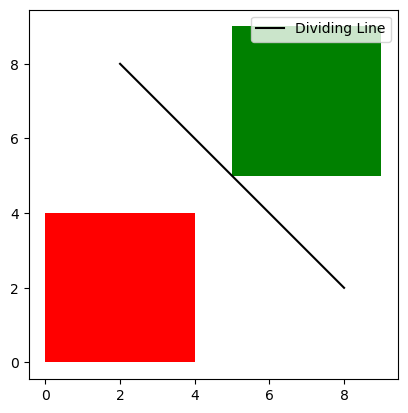

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gdf.plot(ax=ax, color='blue', label='Original Points')
above_line.plot(ax=ax, color='green', label='Above Line')
below_line.plot(ax=ax, color='red', label='Below Line')
plt.plot(*line.xy, color='black', label='Dividing Line')
plt.legend()
plt.show()